In [176]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## CLUSTERING

In [ ]:
"""
This code uses KMeans clustering to cluster countries based on their GDP and CO2 emissions in 2010. 
It imports the necessary libraries, defines a function to call a file, reads the GDP and CO2 emission files, 
renames the columns, creates a new dataframe with the relevant columns, and creates a scatter plot of the data. 
The data is then scaled and the KMeans clustering model is used to create 3 clusters. 
The cluster centers are plotted, it finds the optimal number of clusters using the elbow method, the sum of squared error is plotted, 
and new dataframes are created for each cluster.

"""

In [114]:

def call_file(indicator_used, sheet_name):
    
    """    
    Read in an excel file from a provided URL and sheet name.        
    
    Parameters:    
    indicator_used (str): The URL of the excel file.    
    sheet_name (str): The name of the sheet.        
    
    Returns:    
    df (dataframe): The dataframe read in from the excel file.    
    
    
    """
    
    df = pd.read_excel(indicator_used, sheet_name=sheet_name, skiprows=3)
    return df

In [67]:
#read in the GDP and CO2 emission files

#define indicators
GDP = ('https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel')
CO2_emission = ('https://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=excel')

sheet_name = ('Data')

#call files
gdp_file = call_file(GDP, sheet_name)
co2_file = call_file(CO2_emission, sheet_name)

In [70]:
print(gdp_file)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [71]:
print(co2_file)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,543439.999305,565430.012964,587699.992426,574029.994987,578510.015696,587509.992346,590040.005282,603030.016154,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,8079.999924,5989.999771,4880.000114,5949.999809,5300.000191,4780.000210,6070.000172,6079.999924,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,177939.995751,193299.997561,201680.001885,198410.002500,206030.001298,204740.000457,211719.999298,220740.000024,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,23870.000839,26959.999084,29629.999161,31649.999619,29760.000229,24250.000000,23959.999084,25209.999084,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,21010.000229,27829.999924,27430.000305,13550.000191,10850.000381,10010.000229,9720.000267,11100.000381,NaN,NaN
263,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,426779.998779,436920.013428,447929.992676,424809.997559,425140.014648,435649.993896,434350.006104,439640.014648,NaN,NaN
264,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,4030.000210,4239.999771,4690.000057,4960.000038,5320.000172,6809.999943,7730.000019,6800.000191,NaN,NaN


In [72]:
#rename the columns
gdp_file.rename({'2010':'2010_GDP'}, axis=1, inplace=True)
co2_file.rename({'2010':'2010_CO2_emission'}, axis=1, inplace=True)

In [120]:
#create a new dataframe with the relevant columns
df_clust = gdp_file[['Country Name', 'Country Code', '2010_GDP']].copy()
co2 = co2_file[['2010_CO2_emission']].copy()

In [121]:
df_clust = df_clust.join(co2)

In [122]:
print(df_clust)

                    Country Name Country Code      2010_GDP  2010_CO2_emission
0                          Aruba          ABW  24452.928363                NaN
1    Africa Eastern and Southern          AFE   1643.550495      529639.997445
2                    Afghanistan          AFG    554.595200        7110.000134
3     Africa Western and Central          AFW   1675.739572      165489.997715
4                         Angola          AGO   3496.784796       22799.999237
..                           ...          ...           ...                ...
261                       Kosovo          XKX   3009.559334                NaN
262                  Yemen, Rep.          YEM   1249.063085       25430.000305
263                 South Africa          ZAF   8059.587017      425309.997559
264                       Zambia          ZMB   1469.361450        2660.000086
265                     Zimbabwe          ZWE    937.840338        9600.000381

[266 rows x 4 columns]


In [123]:
#drop any row with missing values as its going to affect our clustering
df_clust = df_clust.dropna()

Text(0.5, 1.0, 'GDP vs CO2 Emissions')

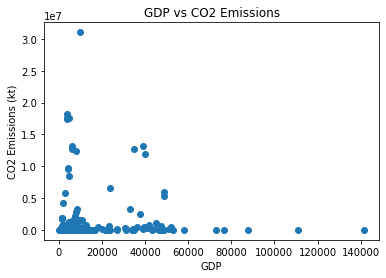

In [124]:
#create a scatter plot of the data

plt.scatter(df_clust['2010_GDP'], df_clust['2010_CO2_emission'])
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions (kt)')
plt.title('GDP vs CO2 Emissions')

In [125]:
#find the optimal number of clusters using the elbow method
k_rng = range(1, 11)
sse = []
for i in k_rng:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clust[['2010_GDP', '2010_CO2_emission']])
    sse.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [126]:
print(sse)

[3329280803924495.0, 624992817125312.0, 333344147328252.25, 153183900136484.16, 76514623383013.72, 38943776993993.67, 18963976847866.703, 11736481191600.602, 7028386111971.082, 5884307728492.324]


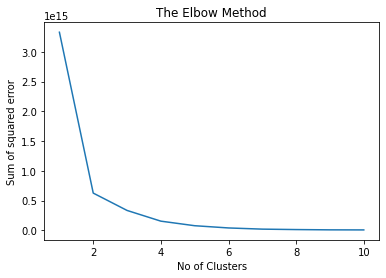

In [127]:
#plot the elbow graph
plt.plot(k_rng, sse)
plt.xlabel('No of Clusters')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method')
plt.savefig('clusters.png')
plt.show()
    

In [128]:
X = df_clust[["2010_GDP", "2010_CO2_emission"]].copy()
print(X)

,2010_GDP,2010_CO2_emission
1,1643.550495,529639.997445
2,554.595200,7110.000134
3,1675.739572,165489.997715
4,3496.784796,22799.999237
5,4094.348386,4449.999809
...,...,...
260,3494.341524,189.999998
262,1249.063085,25430.000305
263,8059.587017,425309.997559
264,1469.361450,2660.000086


In [129]:
#set the number of clusters
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [130]:
#fit the data and predict clusters
y_predicted = km.fit_predict(X)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 2 0 0 0 0 0 1 0 0 0 0 0]


In [131]:
#add the cluster column to the dataframe
X['cluster'] = y_predicted

In [132]:
X.head()

,2010_GDP,2010_CO2_emission,cluster
1,1643.550495,529639.997445,0
2,554.595200,7110.000134,0
3,1675.739572,165489.997715,0
4,3496.784796,22799.999237,0
5,4094.348386,4449.999809,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


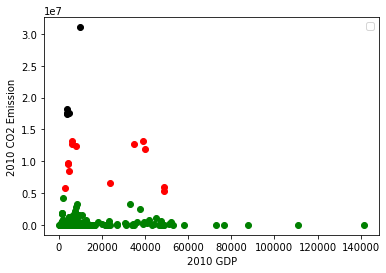

In [133]:
#create separate dataframes for each cluster
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]

#create a scatter plot for each cluster
plt.scatter(df1['2010_GDP'], df1['2010_CO2_emission'], color='green')
plt.scatter(df2['2010_GDP'], df2['2010_CO2_emission'], color='black')
plt.scatter(df3['2010_GDP'], df3['2010_CO2_emission'], color='red')

plt.xlabel('2010 GDP')
plt.ylabel('2010 CO2 Emission')
plt.legend()

In [134]:
#list of columns to be scaled
cols_to_scale = ['2010_GDP', '2010_CO2_emission']

#create scaler instance
scaler = MinMaxScaler()

#scale the columns in the dataset
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

#assign scaled data to new_X
new_X = X[cols_to_scale]

In [135]:
print(new_X)

,2010_GDP,2010_CO2_emission
1,0.010060,0.017061
2,0.002350,0.000229
3,0.010288,0.005331
4,0.023180,0.000734
5,0.027411,0.000143
...,...,...
260,0.023163,0.000006
262,0.007267,0.000819
263,0.055485,0.013700
264,0.008827,0.000085


In [136]:
#create kmeans with 3 clusters
km = KMeans(n_clusters=3)

#fit the clustered data
y_predicted = km.fit_predict(new_X)
print(y_predicted)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

In [137]:
#add the cluster column to the original data
X['cluster'] = y_predicted

X.head(10)

,2010_GDP,2010_CO2_emission,cluster
1,0.010060,0.017061,0
2,0.002350,0.000229,0
3,0.010288,0.005331,0
4,0.023180,0.000734,0
5,0.027411,0.000143,0
6,0.339947,0.000016,1
7,0.043631,0.049665,0
8,0.240315,0.005244,1
9,0.071955,0.005386,0
10,0.020676,0.000139,0


In [138]:
#the scaled cluster centers
km.cluster_centers_

array([[0.03887083, 0.00934037],
       [0.3591704 , 0.02197346],
       [0.08517051, 0.47275476]])

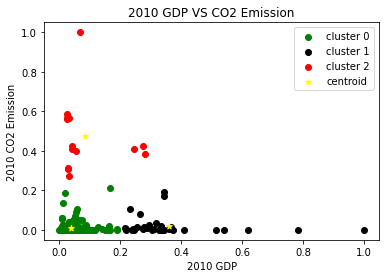

In [148]:
#dataframes for the clusters
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]

#visualising the clusters and centroids
plt.scatter(df1['2010_GDP'], df1['2010_CO2_emission'], color='green', label = 'cluster 0')
plt.scatter(df2['2010_GDP'], df2['2010_CO2_emission'], color='black', label = 'cluster 1')
plt.scatter(df3['2010_GDP'], df3['2010_CO2_emission'], color='red', label = 'cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.title('2010 GDP VS CO2 Emission')
plt.xlabel('2010 GDP')
plt.ylabel('2010 CO2 Emission')
plt.legend()

In [140]:
#assign the labels of the clusters to the cluster column of the original dataframe
df_clust['cluster'] = km.labels_

In [141]:
df_clust.head(20)

,Country Name,Country Code,2010_GDP,2010_CO2_emission,cluster
1,Africa Eastern and Southern,AFE,1643.550495,5.296400e+05,0
2,Afghanistan,AFG,554.595200,7.110000e+03,0
3,Africa Western and Central,AFW,1675.739572,1.654900e+05,0
4,Angola,AGO,3496.784796,2.280000e+04,0
5,Albania,ALB,4094.348386,4.450000e+03,0
6,Andorra,AND,48238.466096,5.200000e+02,1
7,Arab World,ARB,6385.356001,1.541777e+06,0
8,United Arab Emirates,ARE,34165.913305,1.627900e+05,1
9,Argentina,ARG,10385.964432,1.672200e+05,0
10,Armenia,ARM,3143.029202,4.340000e+03,0


In [142]:
#create new dataframes for each cluster
first_cluster = df_clust.loc[df_clust['cluster'] == 0]

In [143]:
second_cluster = df_clust.loc[df_clust['cluster'] == 1]

In [144]:
third_cluster = df_clust.loc[df_clust['cluster'] == 2]

In [145]:
print(first_cluster)

,Country Name,Country Code,2010_GDP,2010_CO2_emission,cluster
1,Africa Eastern and Southern,AFE,1643.550495,529639.997445,0
2,Afghanistan,AFG,554.595200,7110.000134,0
3,Africa Western and Central,AFW,1675.739572,165489.997715,0
4,Angola,AGO,3496.784796,22799.999237,0
5,Albania,ALB,4094.348386,4449.999809,0
...,...,...,...,...,...
260,Samoa,WSM,3494.341524,189.999998,0
262,"Yemen, Rep.",YEM,1249.063085,25430.000305,0
263,South Africa,ZAF,8059.587017,425309.997559,0
264,Zambia,ZMB,1469.361450,2660.000086,0


In [146]:
print(second_cluster)

,Country Name,Country Code,2010_GDP,2010_CO2_emission,cluster
6,Andorra,AND,48238.466096,5.200000e+02,1
8,United Arab Emirates,ARE,34165.913305,1.627900e+05,1
13,Australia,AUS,52134.308850,3.875400e+05,1
14,Austria,AUT,46903.761585,6.996000e+04,1
17,Belgium,BEL,44184.946354,1.067200e+05,1
31,Brunei Darussalam,BRN,34609.940430,7.170000e+03,1
35,Canada,CAN,47562.083425,5.370100e+05,1
37,Switzerland,CHE,76531.372941,4.521000e+04,1
53,Cyprus,CYP,31105.398438,7.900000e+03,1
55,Germany,DEU,41572.455948,7.730700e+05,1


In [147]:
print(third_cluster)

,Country Name,Country Code,2010_GDP,2010_CO2_emission,cluster
40,China,CHN,4550.453108,8.474920e+06,2
61,East Asia & Pacific (excluding high income),EAP,4006.365501,9.648332e+06,2
63,East Asia & Pacific,EAS,7721.630865,1.234673e+07,2
95,High income,HIC,38785.778441,1.314204e+07,2
102,IBRD only,IBD,4520.727179,1.750211e+07,2
103,IDA & IBRD total,IBT,3731.641865,1.819493e+07,2
140,Low & middle income,LMY,3550.838776,1.760212e+07,2
142,Late-demographic dividend,LTE,6206.337902,1.270765e+07,2
156,Middle income,MIC,3799.772428,1.740167e+07,2
181,OECD members,OED,35053.000292,1.268223e+07,2


In [ ]:
first_cluster_avg_gdp = round(first_cluster['2010_GDP'].mean(),2)

In [152]:
def cluster_mean(data):
    m = round(data.mean(),2)
    return m

In [168]:
#call gdp of all the cluster
first_gdp = first_cluster['2010_GDP']
second_gdp = second_cluster['2010_GDP']
third_gdp = third_cluster['2010_GDP']

In [169]:
cluster_mean(first_gdp)

5712.97

In [170]:
cluster_mean(second_gdp)


50953.68

In [167]:
cluster_mean(third_gdp)

12252.57

In [172]:
#call co2 emission of all the cluster
first_co2 = first_cluster['2010_CO2_emission']
second_co2 = second_cluster['2010_CO2_emission']
third_co2 = third_cluster['2010_CO2_emission']

In [173]:
cluster_mean(first_co2)

289967.43

In [174]:
cluster_mean(second_co2)

682142.28

In [175]:
cluster_mean(third_co2)

14675956.76

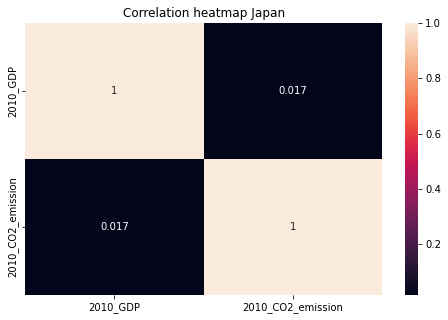

In [195]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(new_X.corr(),annot=True)
plt.title('Correlation heatmap Japan')
plt.show()

## FITTING